# TrafficSign Image Classification

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. We cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Our benchmark has the following properties:

Single-image, multi-class classification problem
More than 40 classes
More than 50,000 images in total
Large, lifelike database

# Import Libraries

In [1]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image
import pydot

# For ploting
import matplotlib.pyplot as plt

# For the model and it's training
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [32]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [33]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

In [4]:
# Testing GPU
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

print(tf.__version__)

Please install GPU version of TF
2.10.0


### *Downloading Data from Kaggle*

In [ ]:
# # Make a directory named `.kaggle` 
# !mkdir ~/.kaggle

# ## Copy the kaggle.json into this new directory 
# !cp kaggle.json ~/.kaggle/

# ## Change permission for this directory : 
# !chmod 600 ~/.kaggle/kaggle.json

# #%%time 
# # Download Dataset
# # Source dataset : https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

# !kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

# # Every dataset that downloaded from Kaggle, is in format `.zip`. So, we must unzip it before we can using the dataset.

# !unzip ./gtsrb-german-traffic-sign.zip

# Data Loading

In [5]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join("/path/to/dataset",'Train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [3]:
dataset_directory = "/path/to/model_folder"
train_path = "/path/to/model_folder/dataset/Train"

# Data Eksploring

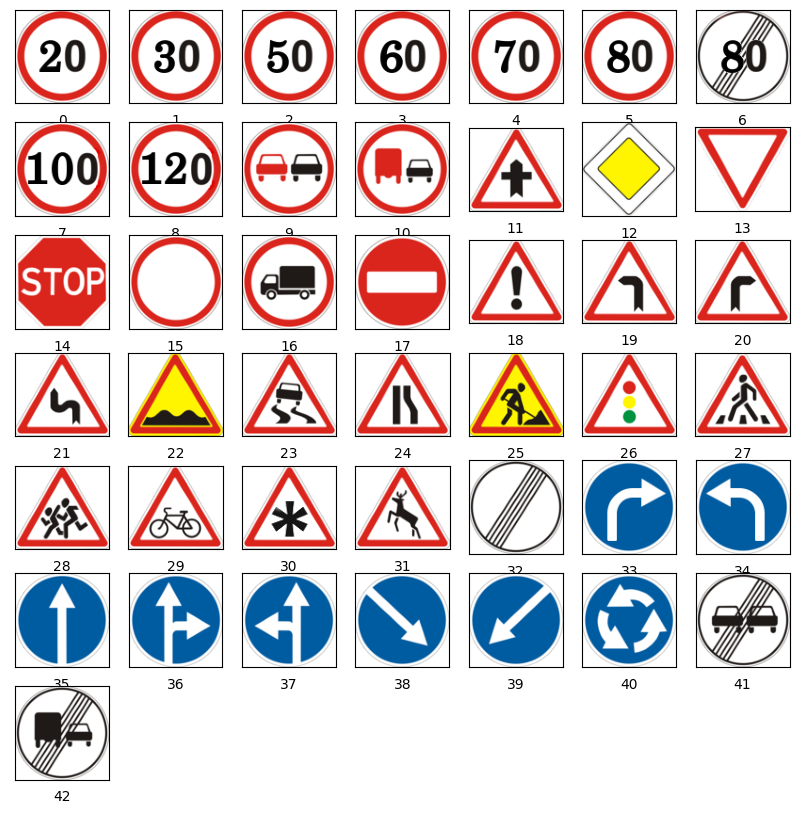

In [7]:
# Show image example each class
plt.figure(figsize=(10, 10))
for i in range (0,43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path = dataset_directory + "/Meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(i)

In [9]:
# Shape of data image and labels
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Data Splitting

In [10]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)

# Normalizing
X_train = X_train/255.0
X_test = X_test/255.0

# Displaying the shape after the split
print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

X_train.shape (31367, 30, 30, 3)
X_test.shape (7842, 30, 30, 3)
y_train.shape (31367,)
y_test.shape (7842,)


In [11]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

print("y_train.shape after encoding", y_train.shape)
print("y_test.shape after encoding", y_test.shape)

y_train.shape after encoding (31367, 43)
y_test.shape after encoding (7842, 43)


# Model Defining & Compiling

In [12]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) # kernel size (5,5) - the size of a convolutional filter is (5,5)
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) # kernel size (3,3) - the size of a convolutional filter is (3,3)
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [18]:
# plot the model algorithm
plot_model(model, show_shapes = True, show_layer_names = False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Model Training

In [19]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 40
    model_learn = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/40
981/981 [==============================] - 39s 40ms/step - loss: 1.3960 - accuracy: 0.6126 - val_loss: 0.1905 - val_accuracy: 0.9535
Epoch 2/40
981/981 [==============================] - 38s 38ms/step - loss: 0.2743 - accuracy: 0.9164 - val_loss: 0.0866 - val_accuracy: 0.9787
Epoch 3/40
981/981 [==============================] - 38s 39ms/step - loss: 0.1713 - accuracy: 0.9487 - val_loss: 0.0533 - val_accuracy: 0.9855
Epoch 4/40
981/981 [==============================] - 39s 40ms/step - loss: 0.1324 - accuracy: 0.9593 - val_loss: 0.0503 - val_accuracy: 0.9871
Epoch 5/40
981/981 [==============================] - 40s 40ms/step - loss: 0.1080 - accuracy: 0.9664 - val_loss: 0.0274 - val_accuracy: 0.9923
Epoch 6/40
981/981 [==============================] - 38s 39ms/step - loss: 0.0906 - accuracy: 0.9726 - val_loss: 0.0361 - val_accuracy: 0.9909
Epoch 7/40
981/981 [==============================] - 38s 39ms/step - loss: 0.0717 - accuracy: 0.9775 - val_loss: 0.0299 - val_accuracy:

### *Visualizing the performance of the Model during Training Phase*

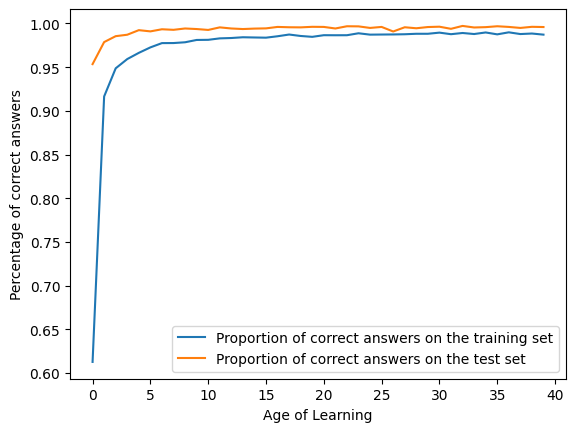

In [20]:
# Plot if model performance on accuracy
plt.plot(model_learn.history['accuracy'], 
         label='Proportion of correct answers on the training set')
plt.plot(model_learn.history['val_accuracy'], 
         label='Proportion of correct answers on the test set')
plt.xlabel('Age of Learning')
plt.ylabel('Percentage of correct answers')
plt.legend()
plt.show()

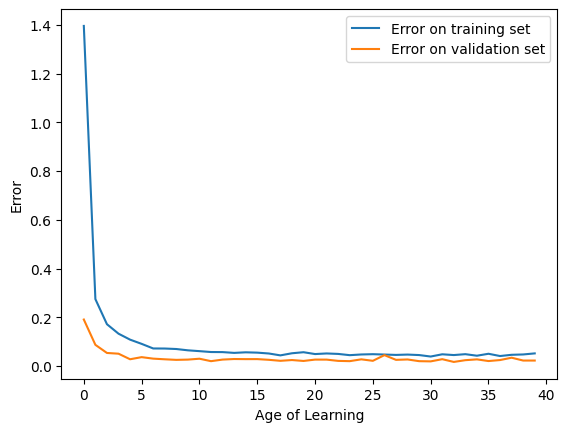

In [21]:
# Plot if model performance on accuracy
plt.plot(model_learn.history['loss'], 
         label='Error on training set')
plt.plot(model_learn.history['val_loss'], 
         label='Error on validation set')
plt.xlabel('Age of Learning')
plt.ylabel('Error')
plt.legend()
plt.show()

### *Loading Test Dataset and Evaluating the Model*

In [10]:
# Dictionary of each class
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [23]:
# Importing the test dataset
y_new = pd.read_csv(dataset_directory + '/Test.csv')

labels = y_new["ClassId"].values
imgs = y_new["Path"].values

newdata=[]

# Retreiving the images with GPU
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open(dataset_directory + '/' + img)
        image = image.resize([30, 30])
        newdata.append(np.array(image))

# # Retreiving the images without GPU
# for img in imgs:
#     try:
#         image = cv2.imread(dataset_directory + '/' +img)
#         image_fromarray = Image.fromarray(image, 'RGB')
#         resize_image = image_fromarray.resize((30, 30))
#         data.append(np.array(resize_image))
#     except:
#         print("Error in " + img)

X_new = np.array(newdata) 
X_new = X_new/255.0

with tf.device('/GPU:0'):
    predict_x = model.predict(X_new) 
    classes_x = np.argmax(predict_x, axis = 1)

# Accuracy with the test data
print('Test accuracy: ', accuracy_score(labels, classes_x)*100)


395/395 [==============================] - 2s 6ms/step
Test accuracy:  97.62470308788599


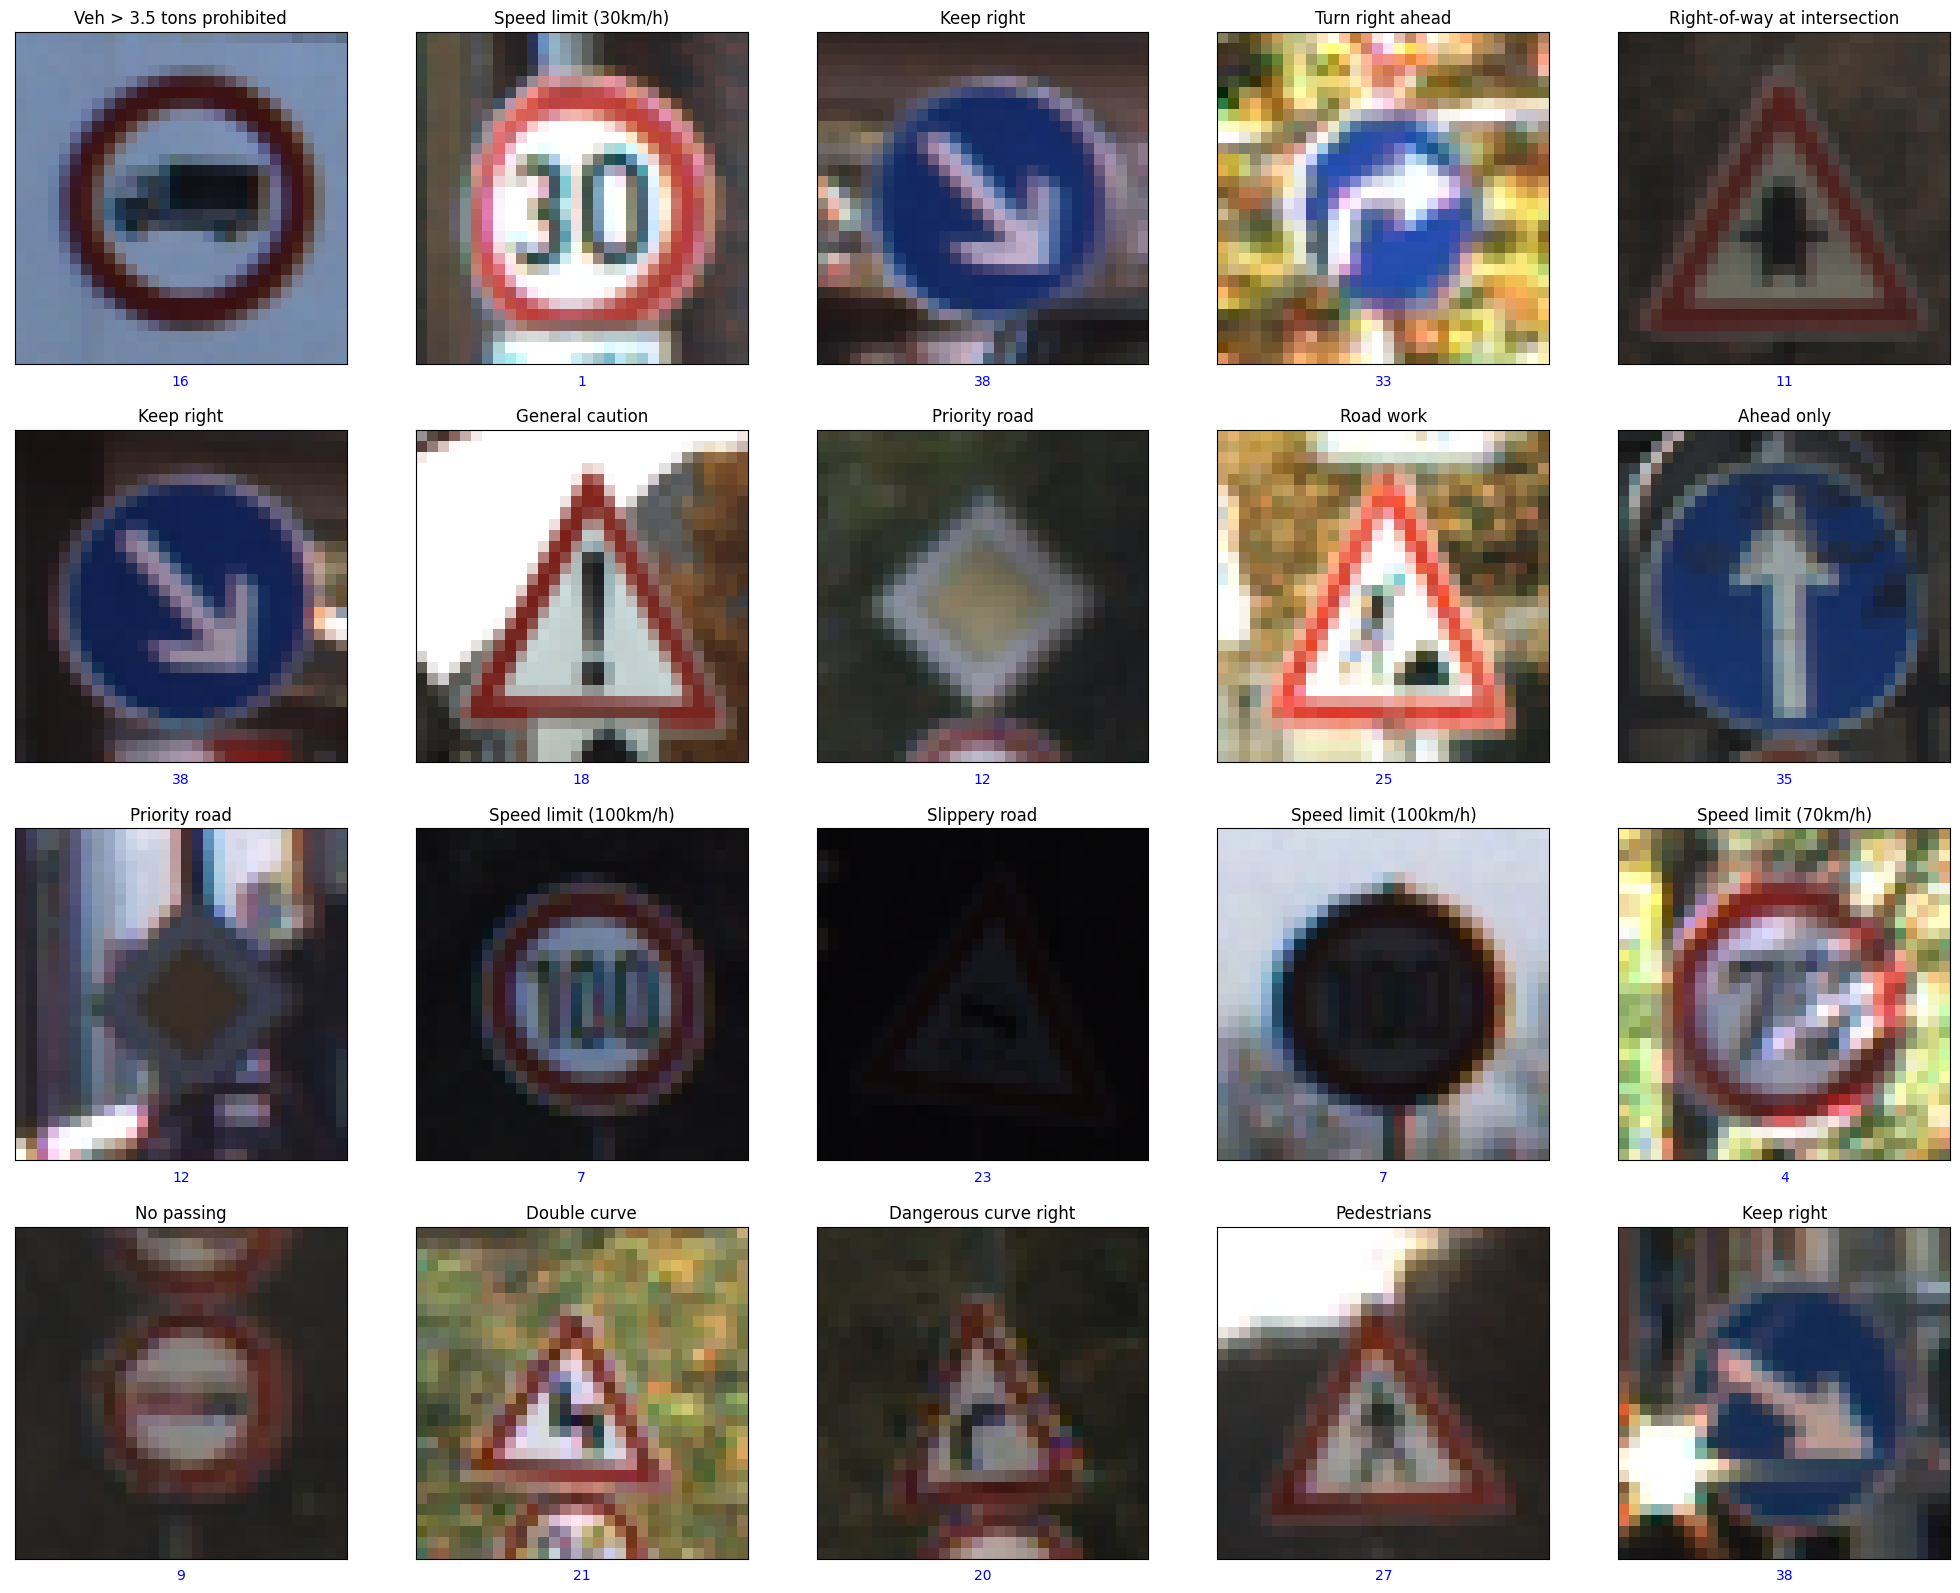

In [24]:
# Image predicted with predicted class
plt.figure(figsize = (25, 25))
start_index = 0
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = classes_x[start_index + i]
    actual = labels[start_index + i]
    col = 'b'
    if prediction != actual:
        col = 'r'
    plt.xlabel(prediction, color = col)
    plt.title(classes[labels[i]])
    plt.imshow(X_new[start_index + i])
plt.show()

# Model Inference

Finally, let's use our model to classify an image that wasn't included in the training or validation sets.

In [4]:
# Loading data inference
test_image = dataset_directory + r'/Test/00057.png'

img = keras.preprocessing.image.load_img(
    test_image, target_size=([30, 30])
)

In [5]:
img # showing image

In [12]:
# predicting with docker API
import requests
import json
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

# Processing
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# json input
input_data_json_img = json.dumps({
    "signature_name": "serving_default",
    "instances": img_array.tolist(),
})

# predicting
URL = 'https://traffic-classifier-backend.herokuapp.com/v1/models/traffic_classifier:predict' # using backend model API that I build and deploy on heroku
URL = 'http://localhost:8501/v1/models/traffic_classifier:predict' # using backend model API that I build and trying it with docker
response_img = requests.post(URL, data=input_data_json_img)
response_img.raise_for_status() # raise an exception in case of error
response_img = response_img.json()

# predicting result
score_img = tf.nn.softmax(response_img['predictions'][0])
destination_by_img = classes[np.argmax(score_img)]

# predicting result
score = tf.nn.softmax(response_img['predictions'][0])
print(
    "### This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score))
)

### This image most likely belongs to Traffic signals with a 6.08 percent confidence.


In [36]:
# Processing
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Predicting
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 36ms/step
This image most likely belongs to Traffic signals with a 6.08 percent confidence.


# Model Saving

In [29]:
# Save the model in HDF5 format // to use for data inference
model.save('traffic_classifier.h5')

In [30]:
# freeze model
for layer in model.layers:
  layer.trainable = False

# Save model for backend
model.save("traffic_classifier")

INFO:tensorflow:Assets written to: traffic_classifier\assets


INFO:tensorflow:Assets written to: traffic_classifier\assets


In [31]:
# saving model with .sav format for deployment on django

import pickle
pickle.dump(model,open("traffic_classifier.sav", "wb"))

INFO:tensorflow:Assets written to: ram://cf08eeaf-c717-400f-b0b3-95b59a7d41d1/assets


INFO:tensorflow:Assets written to: ram://cf08eeaf-c717-400f-b0b3-95b59a7d41d1/assets
